In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler, MinMaxScaler


In [2]:
#Importing the dataset
df=pd.read_csv('heart_disease_uci.csv')


Data Preprocessing

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [5]:
#dropping id column from the datset
df.drop(columns='id',inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [7]:
df.shape

(920, 15)

In [8]:
df['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


In [9]:
#calculating the total number of null values in each column
df.isna().sum()/df.shape[0]

,0
age,0.000000
sex,0.000000
dataset,0.000000
cp,0.000000
trestbps,0.064130
chol,0.032609
fbs,0.097826
restecg,0.002174
thalch,0.059783
exang,0.059783


In [10]:
#Dividing our dataset on basis of outcome to impute null values
df0=df[df['num']==0]
df1=df[df['num']==1]
df2=df[df['num']==2]
df3=df[df['num']==3]
df4=df[df['num']==4]
df1.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
9,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1
16,48,Male,Cleveland,atypical angina,110.0,229.0,False,normal,168.0,False,1.0,downsloping,0.0,reversable defect,1
22,58,Male,Cleveland,atypical angina,120.0,284.0,False,lv hypertrophy,160.0,False,1.8,flat,0.0,normal,1
32,64,Male,Cleveland,non-anginal,140.0,335.0,False,normal,158.0,False,0.0,upsloping,0.0,normal,1


In [ ]:
#Imputing null values with their respective meanvalues for numeric columns
null_numeric_columns = ['ca','trestbps','chol','thalch','oldpeak']
df0.loc[:, null_numeric_columns] = df0[null_numeric_columns].fillna(df0[null_numeric_columns].mean())
df1.loc[:, null_numeric_columns] = df1[null_numeric_columns].fillna(df1[null_numeric_columns].mean())
df2.loc[:, null_numeric_columns] = df2[null_numeric_columns].fillna(df2[null_numeric_columns].mean())
df3.loc[:, null_numeric_columns] = df3[null_numeric_columns].fillna(df3[null_numeric_columns].mean())
df4.loc[:, null_numeric_columns] = df4[null_numeric_columns].fillna(df4[null_numeric_columns].mean())

#Imputing null values with their respective mode value for categorical columns
null_categorical_columns=['thal','slope','exang','restecg','fbs']
df0.loc[:, null_categorical_columns] = df0[null_categorical_columns].fillna(df0[null_categorical_columns].mode().iloc[0])
df1.loc[:, null_categorical_columns] = df1[null_categorical_columns].fillna(df1[null_categorical_columns].mode().iloc[0])
df2.loc[:, null_categorical_columns] = df2[null_categorical_columns].fillna(df2[null_categorical_columns].mode().iloc[0])
df3.loc[:, null_categorical_columns] = df3[null_categorical_columns].fillna(df3[null_categorical_columns].mode().iloc[0])
df4.loc[:, null_categorical_columns] = df4[null_categorical_columns].fillna(df4[null_categorical_columns].mode().iloc[0])

<ipython-input-11-195fdb2b5af2>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df0.loc[:, null_categorical_columns] = df0[null_categorical_columns].fillna(df0[null_categorical_columns].mode().iloc[0])
<ipython-input-11-195fdb2b5af2>:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.loc[:, null_categorical_columns] = df1[null_categorical_columns].fillna(df1[null_categorical_columns].mode().iloc[0])
<ipython-input-11-195fdb2b5af2>:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future 

In [12]:
#Combining the 5 datsets into 1 datset after imputation of null values which we splited based on their outcome
df_combined = pd.concat([df0,df1,df2,df3,df4])
df_combined.sort_index(inplace=True)
df_combined.isna().sum()#reverification of null values count in each column

,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0


In [13]:
#Splitting our dataset into input and output
X=df_combined.drop('num',axis=1)
y=df_combined['num']
X.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [14]:
y.value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


In [ ]:
#Encoding the categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns=X.select_dtypes(include=['int64','float64']).columns

encoder=OneHotEncoder(sparse_output=False)

encoded_categorical_data=encoder.fit_transform(X[categorical_columns])

encoded_categorical_df=pd.DataFrame(encoded_categorical_data,columns=encoder.get_feature_names_out(categorical_columns))


In [16]:
#Standardizing the numeric columns
scaler=StandardScaler()

scaled_numerical_data=scaler.fit_transform(X[numeric_columns])
scaled_numerical_df=pd.DataFrame(scaled_numerical_data,columns=numeric_columns)
X_final=pd.concat([scaled_numerical_df,encoded_categorical_df],axis=1)

X_final.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'sex_Female',
       'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')

In [17]:
X_final.head()

,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1.007386,0.694134,0.307072,0.499490,1.327159,-1.083100,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.432034,1.507214,0.793243,-1.161370,0.574309,3.531413,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.432034,-0.660999,0.270379,-0.330940,1.609477,1.993242,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.752828,-0.118946,0.463013,1.962629,2.456433,-1.083100,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-1.328180,-0.118946,0.041054,1.369464,0.480203,-1.083100,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.metrics import Precision,Recall
from tensorflow.keras.layers import Dense,Input
from sklearn.metrics import accuracy_score,recall_score
from sklearn.model_selection import train_test_split

In [19]:
#Splitting the dataset into train and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X_final,y,test_size=0.2,random_state=42)

Construction Of ANN

In [20]:
#Constructing the ANN with input layer(30) ,first hidden layer(nodes=32 ),second hidden layer(nodes=16 ) and an output layer(nodes=5)
#Hidden layers with activation function :'relu' and output layer with activation function:'softmax'
model = Sequential([
    Input(shape=(X_final.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=5, activation='softmax')
])

In [21]:
#Creation of model with sparse_categorical_crossentropy loss function with an optimizer stochastic gradient descent
# Calculation of model metrics :accuracy,recall and precision
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [22]:
#Model generation with our training dataset
#batch_size of 32
epochs=500
history=model.fit(X_train,Y_train,epochs=epochs,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2810 - loss: 1.5329 - val_accuracy: 0.4783 - val_loss: 1.3729
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4472 - loss: 1.3756 - val_accuracy: 0.5707 - val_loss: 1.2691
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5801 - loss: 1.2622 - val_accuracy: 0.5761 - val_loss: 1.1864
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6107 - loss: 1.1408 - val_accuracy: 0.5870 - val_loss: 1.1230
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6258 - loss: 1.0920 - val_accuracy: 0.5870 - val_loss: 1.0745
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6429 - loss: 1.0095 - val_accuracy: 0.5761 - val_loss: 1.0334
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6506 - loss: 0.9806 - val_accuracy: 0.5761 - val_loss: 0.9991
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6178 - loss: 0.9804 - val_accuracy: 0.5707 - 

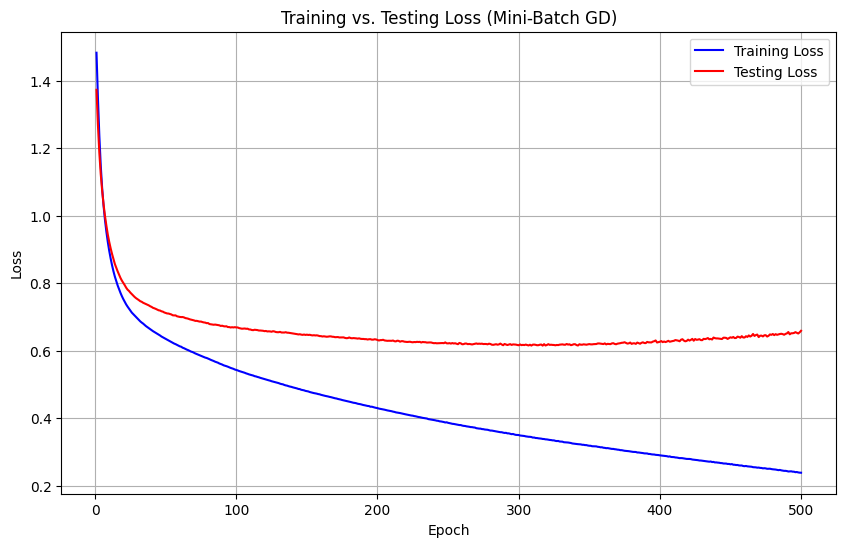

In [23]:
#Plotting training and test set loss for each epoch
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), history.history['loss'], label='Training Loss', color='blue')
plt.plot(range(1, epochs+1), history.history['val_loss'], label='Testing Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Testing Loss (Mini-Batch GD)')
plt.grid(True)
plt.legend()
plt.show()


In [24]:
#Finding at which epoch the test set loss is minimum
l=history.history['val_loss']
min_index=l.index(min(l))
print(min_index)

316


Reconstructing optimum model

In [25]:
#Reconstuction of optimum model(for which the test set loss is minimum)
optimum_model = Sequential([
    Input(shape=(X_final.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=5, activation='softmax')
])

In [26]:
optimum_model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [27]:
history_final=optimum_model.fit(X_train,Y_train,epochs=min_index,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/316
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1481 - loss: 1.7903 - val_accuracy: 0.3370 - val_loss: 1.5678
Epoch 2/316
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3792 - loss: 1.5081 - val_accuracy: 0.4293 - val_loss: 1.4254
Epoch 3/316
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4665 - loss: 1.3820 - val_accuracy: 0.5000 - val_loss: 1.3279
Epoch 4/316
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5067 - loss: 1.3090 - val_accuracy: 0.5217 - val_loss: 1.2532
Epoch 5/316
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5744 - loss: 1.1931 - val_accuracy: 0.5326 - val_loss: 1.1949
Epoch 6/316
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5967 - loss: 1.1162 - val_accuracy: 0.5598 - val_loss: 1.1472
Epoch 7/316
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6169 - loss: 1.0707 - val_accuracy: 0.5707 - val_loss: 1.1102
Epoch 8/316
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6363 - loss: 1.0224 - val_accuracy: 0.5761 - 

In [28]:
#Predicting the output based on our optimum model with a threshold 0.5 on output layer
Y_test_prob=optimum_model.predict(X_test)
Y_test_pred=tf.argmax(Y_test_prob,axis=1)
Y_train_prob=optimum_model.predict(X_train)
Y_train_pred=tf.argmax(Y_train_prob,axis=1)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [29]:
#Calculation of Accuracy  for Train and Test datasets
train_accuracy_score=accuracy_score(Y_train,Y_train_pred)
test_accuracy_score=accuracy_score(Y_test,Y_test_pred)


print(f'accuracy score of train data is {train_accuracy_score}')

print()
print(f'accuracy score of test data is {test_accuracy_score}')





accuracy score of train data is 0.8885869565217391

accuracy score of test data is 0.75
